# Chapter 5: Explanation

Load the modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Simple Meaning

Read in the data. Drop the unused variable.

In [2]:
gala = pd.read_csv("data/gala.csv", index_col=0)
gala.drop('Endemics', axis=1, inplace=True)
gala.head()

Species   Area  Elevation  Nearest  Scruz  Adjacent
Baltra          58  25.09        346      0.6    0.6      1.84
Bartolome       31   1.24        109      0.6   26.3    572.33
Caldwell         3   0.21        114      2.8   58.7      0.78
Champion        25   0.10         46      1.9   47.4      0.18
Coamano          2   0.05         77      1.9    1.9    903.82

Fit the basic model

In [3]:
lmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Fri, 07 Sep 2018   Prob (F-statistic):           6.84e-07
Time:                        15:26:43   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.715     -32.464      46.601
Area          -0.0239      0.022     -1.068      0.296      -0.070       0.022
Elevation      0.3195      0.054      5.953      0.000       0.209       0.430
Nearest        0.0091      1.054      0.009      0.993      -2.166       2.185
Scruz         -0.2405      0.215     -1.117      0.275      -0.685       0.204
Adjacent      -0.0748      0.018     -4.226      0.000      -0.111      -0.038
==============================================================================
Omnibus:                       12.683   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.498
Skew:                           1.136   Prob(JB):                      0.00117
Kurtosis:                       5.374   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

See how coefficient is different when only one predictor is used:

In [4]:
smf.ols(formula='Species ~ Elevation', data=gala).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     33.59
Date:                Fri, 07 Sep 2018   Prob (F-statistic):           3.18e-06
Time:                        15:26:43   Log-Likelihood:                -172.49
No. Observations:                  30   AIC:                             349.0
Df Residuals:                      28   BIC:                             351.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3351     19.205      0.590      0.560     -28.005      50.675
Elevation      0.2008      0.035      5.795      0.000       0.130       0.272
==============================================================================
Omnibus:                       14.860   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.281
Skew:                           0.878   Prob(JB):                     4.38e-07
Kurtosis:                       7.510   Cond. No.                         741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Set up a plot with univariate regression line added

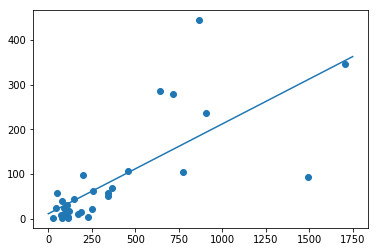

In [5]:
plt.scatter(gala.Elevation, gala.Species)
plt.plot([0,1750],[11.3, 11.3+1750*0.2008])

Mean of all variables

In [6]:
x0 = np.append(1,gala.iloc[:,1:].mean())
x0

array([  1.        , 261.70866667, 368.03333333,  10.06      ,
        56.97666667, 261.09833333])

Find the predicted output when Elevation varies from its minimum to its maximum value.

In [7]:
x0[2] = np.min(gala.Elevation)
yl = np.dot(lmod.params, x0)
x0[2] = np.max(gala.Elevation)
yh = np.dot(lmod.params, x0)
[yl, yh]

[-24.35372847730425, 512.985999339698]

Add this covariate adjusted prediction to the plot and display.

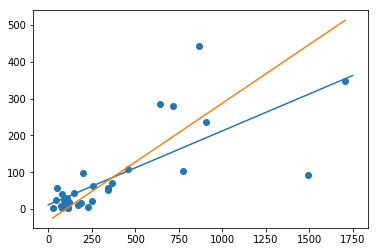

In [8]:
plt.scatter(gala.Elevation, gala.Species)
plt.plot([0,1750],[11.3, 11.3+1750*0.2008])
plt.plot([min(gala.Elevation),max(gala.Elevation)],[yl,yh])

## Observational Data

Read in the New Hampshire voting data

In [9]:
newhamp = pd.read_csv("data/newhamp.csv")

Sum of votes for the candidates by voting method.

In [10]:
newhamp.groupby('votesys').agg({'Obama': sum, 'Clinton': sum})

Obama  Clinton
votesys                
D        86353    96890
H        16926    14471

Set up a binary variable

In [11]:
newhamp['trt'] = np.where(newhamp.votesys == 'H',1,0)

Proportion voting for obama by voting method. See there is a significant difference of 4.25%

In [12]:
smf.ols(formula='pObama ~ trt',data=newhamp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pObama   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     24.93
Date:                Fri, 07 Sep 2018   Prob (F-statistic):           1.06e-06
Time:                        15:26:43   Log-Likelihood:                 350.38
No. Observations:                 276   AIC:                            -696.8
Df Residuals:                     274   BIC:                            -689.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3525      0.005     68.148      0.000       0.342       0.363
trt            0.0425      0.009      4.993      0.000       0.026       0.059
==============================================================================
Omnibus:                        5.996   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                5.738
Skew:                           0.312   Prob(JB):                       0.0568
Kurtosis:                       3.330   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Adjust by previous votes for Dean. Treatment effect becomes insignificant.

In [13]:
smf.ols(formula='pObama ~ trt + Dean',data=newhamp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 pObama   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     98.40
Date:                Fri, 07 Sep 2018   Prob (F-statistic):           6.61e-33
Time:                        15:26:43   Log-Likelihood:                 413.28
No. Observations:                 276   AIC:                            -820.6
Df Residuals:                     273   BIC:                            -809.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2211      0.011     19.655      0.000       0.199       0.243
trt           -0.0048      0.008     -0.613      0.541      -0.020       0.011
Dean           0.5229      0.042     12.555      0.000       0.441       0.605
==============================================================================
Omnibus:                       10.671   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.156
Skew:                           0.304   Prob(JB):                     0.000843
Kurtosis:                       3.928   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check that proportion voting for Dean changes by voting method.

In [14]:
smf.ols(formula='Dean ~ trt',data=newhamp).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Dean   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     84.21
Date:                Fri, 07 Sep 2018   Prob (F-statistic):           1.11e-17
Time:                        15:26:43   Log-Likelihood:                 310.13
No. Observations:                 276   AIC:                            -616.3
Df Residuals:                     274   BIC:                            -609.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2513      0.006     41.986      0.000       0.240       0.263
trt            0.0903      0.010      9.177      0.000       0.071       0.110
==============================================================================
Omnibus:                       14.901   Durbin-Watson:                   1.206
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.737
Skew:                           0.555   Prob(JB):                     0.000383
Kurtosis:                       3.370   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Matching

Uses code from [match module](http://www.kellieottoboni.com/pscore_match/api/match.html)

In [15]:
from match import Match
newhamp.head()

votesys  Obama  Clinton   dem  povrate    pci     Dean    Kerry    white  \
0       D    371      362   979   0.0653  25940  0.27820  0.32030  0.98312   
1       D    345      333   913   0.0380  19773  0.24398  0.36747  0.97349   
2       D    375      570  1305   0.0428  19986  0.20096  0.41627  0.96739   
3       H     92       89   268   0.0669  25627  0.28495  0.33333  0.97892   
4       D    668      595  1633   0.0332  32667  0.24937  0.37781  0.97986   

   absentee  population    pObama  trt  
0  0.059857      4693.0  0.378958    0  
1  0.050449      4266.0  0.377875    0  
2  0.043649      7006.0  0.287356    0  
3  0.107356      1033.0  0.343284    1  
4  0.074706      7033.0  0.409063    0

Construct matched pairs

In [16]:
np.random.seed(100)
mp = Match(newhamp.votesys, newhamp.Dean, caliper=0.01)
str(mp)

'{76: 84, 242: 222, 62: 245, 265: 85, 73: 230, 61: 202, 74: 219, 71: 91, 188: 206, 51: 12, 173: 241, 100: 99, 121: 80, 260: 267, 252: 48, 270: 239, 161: 26, 21: 220, 83: 82, 33: 261, 66: 44, 213: 221, 209: 184, 87: 166, 64: 31, 53: 164, 54: 81, 50: 94, 22: 165, 18: 90, 34: 13, 103: 41, 115: 237, 79: 108, 179: 8, 154: 19, 229: 39, 86: 273, 185: 211, 275: 40, 258: 232, 3: 212, 47: 42, 88: 150, 92: 2, 78: 153, 157: 262, 93: 136, 105: 110, 191: 186, 49: 128, 192: 183, 114: 224, 111: 30, 16: 168, 69: 236, 20: 244, 63: 160, 17: 5, 29: 196, 45: 181, 109: 203, 137: 25, 102: 208, 243: 198}'

Look at a pair. See that Dean voting proportion is very similar.

In [17]:
newhamp.iloc[[51,12],]

votesys  Obama  Clinton   dem  povrate    pci     Dean    Kerry    white  \
51       H     90       69   228   0.0185  24277  0.22941  0.29412  0.96731   
12       D    589      513  1433   0.0657  24867  0.22903  0.39114  0.97644   

    absentee  population    pObama  trt  
51  0.040650       692.0  0.394737    1  
12  0.074593      6121.0  0.411026    0

In [18]:
segs = np.zeros((len(mp), 2, 2), float)
mp.keys()

dict_keys([76, 242, 62, 265, 73, 61, 74, 71, 188, 51, 173, 100, 121, 260, 252, 270, 161, 21, 83, 33, 66, 213, 209, 87, 64, 53, 54, 50, 22, 18, 34, 103, 115, 79, 179, 154, 229, 86, 185, 275, 258, 3, 47, 88, 92, 78, 157, 93, 105, 191, 49, 192, 114, 111, 16, 69, 20, 63, 17, 29, 45, 109, 137, 102, 243])

Draw line segments for matched pairs. This is much more complicated than the R code. 

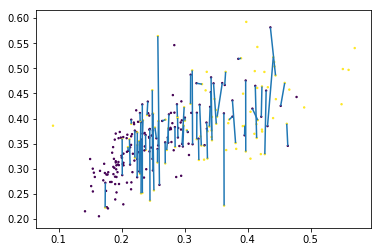

In [19]:
from matplotlib.collections import LineCollection

fig, ax = plt.subplots()
segs = np.zeros((len(mp), 2, 2), float)
segs[:,0,0] = newhamp.Dean.loc[mp.keys()]
segs[:,1,0] = newhamp.Dean.loc[mp.values()]
segs[:,0,1] = newhamp.pObama.loc[mp.keys()]
segs[:,1,1] = newhamp.pObama.loc[mp.values()]

plt.scatter(newhamp.Dean, newhamp.pObama, c=newhamp.trt, s=2)
line_segments = LineCollection(segs)
ax.add_collection(line_segments)
plt.show(ax)

Extract and test the pairwise differences.

In [20]:
pdiff = newhamp.pObama.loc[mp.keys()].ravel() - newhamp.pObama.loc[mp.values()].ravel()
sp.stats.ttest_1samp(pdiff,0)

Ttest_1sampResult(statistic=-1.334272985783414, pvalue=0.18684260598001726)

See that these difference do not varying according Dean voting proportion.

Text(0,0.5,'Digital vs. manual difference')

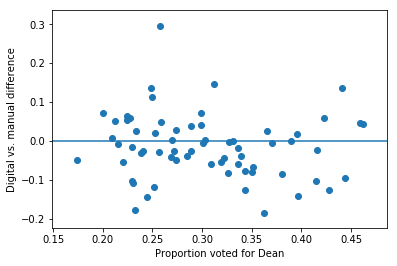

In [21]:
plt.scatter(newhamp.Dean.loc[mp.keys()], pdiff)
plt.axhline(0)
plt.xlabel('Proportion voted for Dean')
plt.ylabel('Digital vs. manual difference')

Construct plot that demonstrates how difference goes away when covariate adjustment is applied and that is functionally similar to matching.

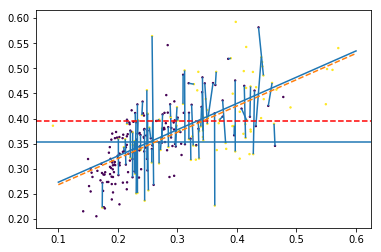

In [22]:
fig, ax = plt.subplots()
plt.scatter(newhamp.Dean, newhamp.pObama, c=newhamp.trt, s=2)
line_segments = LineCollection(segs)
ax.add_collection(line_segments)
plt.axhline(0.353)
plt.axhline(0.353+0.042,linestyle="dashed",c='red')
plt.plot([0.1, 0.6],[0.5229*0.1+0.221, 0.5229*0.6+0.221])
plt.plot([0.1, 0.6],[0.5229*0.1+0.216, 0.5229*0.6+0.216], linestyle="dashed")
plt.show(ax)

In [23]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, scipy, patsy, statsmodels

Software versions
Python 3.7.0 64bit [Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
seaborn 0.9.0
scipy 1.1.0
patsy 0.5.0
statsmodels 0.9.0
Fri Sep 07 15:26:44 2018 BST